In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 4]

In [ ]:
# Let's start by reading in some of these files
from os import listdir
from os.path import isfile, join

mypath='./sim_outputs'
gz_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [ ]:
import re

pattern = re.compile('sim_outputs_1_[0-9]+\.txt\.gz')
bool(pattern.match('sim_outputs_15_100.txt.gz'))

In [ ]:
# Create a dataframe out of the ones for a specified step size 
import gzip 
import re
step_size = 15

specified_files = []
for file in gz_files:    
    pattern = re.compile(f'sim_outputs_{step_size}_[0-9]+\.txt\.gz')

    if bool(pattern.match(file)):
        specified_files.append(file)

sim_df = pd.read_csv(mypath + f'/{specified_files[0]}', sep='\t', compression='gzip')

for file in specified_files[1:]:
    try:
        new_df = pd.read_csv(mypath + f'/{file}', sep='\t', compression='gzip')
        sim_df = pd.concat([sim_df, new_df])
    except:
        print(f"error file {file}")

In [ ]:
def line_scat(val_vec):
    d = {}
    for i in val_vec:
        if not d.get(i):
            d[i] = 0
        d[i] += 1
    ks = sorted(list(d.keys()))
    vs = [d[i] for i in ks]
    return ks, vs

x = np.linspace(1, 10000, 10000)
y = 0.01/x

ks_1, vs_1 = line_scat(sim_df["N01"] + sim_df["N11"])
ks_2, vs_2 = line_scat(sim_df["N10"] + sim_df["N11"])
ks_3, vs_3 = line_scat(sim_df["N11"])


plt.plot(np.array(ks_2), np.array(vs_2)/100000, label="site2")
plt.plot(np.array(ks_1), np.array(vs_1)/100000, label="site1")
plt.plot(np.array(ks_3), np.array(vs_3)/100000, label="double mutants")
plt.plot(x, y, label="hyperbolic expectation")

plt.yscale("log")
plt.xscale("log")
plt.grid()
plt.legend()
plt.xlabel("AF")
plt.ylabel("frequency")
plt.title(f"Neutral Simulation with run multiplier {step_size}")
plt.savefig(f"plots/neutral_sim_AFs_{step_size}.pdf")
plt.show()

## Selection plots

In [ ]:
# Let's start by reading in some of these files
from os import listdir
from os.path import isfile, join

mypath='./sim_outputs/selection'
gz_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

beta_vals = [0.00223607, 0.00423899, 0.00803601, 0.01523415, 0.02887993, 0.05474871, 0.10378908, 0.19675666, 0.37299862, 0.70710678]

In [ ]:
# We now proceed to get all dataframes for a specific site pair
beta_vals = [0.00223607, 0.00423899, 0.00803601, 0.01523415, 0.02887993, 0.05474871, 0.10378908, 0.19675666, 0.37299862, 0.70710678]
site_1 = 1
site_2 = 4

site_1_pos = True
site_2_pos = False

import re

pattern = re.compile(f'sim_outputs_{site_1}_{site_2}_[0-9]+\.txt\.gz')

specified_files = []
for file in gz_files:    
    if bool(pattern.match(file)):
        specified_files.append(file)

# Build the dataframe
sim_df = pd.read_csv(mypath + f'/{specified_files[0]}', sep='\t', compression='gzip')

for file in specified_files[1:]:
    try:
        new_df = pd.read_csv(mypath + f'/{file}', sep='\t', compression='gzip')
        sim_df = pd.concat([sim_df, new_df])
    except:
        print(f"error file {file}")

In [ ]:
# Let's create folders for all of the pairs of values
import os

parent_dir = './plots/selection/'
for i in range(10):
    for j in range(i, 10):
        directory = f'{i}_{j}'
        path = os.path.join(parent_dir, directory)
        os.mkdir(path)


In [ ]:
# Finally, we plot after subsetting for the signage we want
def line_scat(val_vec):
    d = {}
    for i in val_vec:
        if not d.get(i):
            d[i] = 0
        d[i] += 1
    ks = sorted(list(d.keys()))
    vs = [d[i] for i in ks]
    return ks, vs

def buildSelectionPlot(beta_vals, sim_df, site_1, site_2, site_1_pos, site_2_pos):
    if site_1_pos:
        sim_df = sim_df[sim_df['beta_1'] > 0]
    else:
        sim_df = sim_df[sim_df['beta_1'] < 0]

    if site_2_pos:
        sim_df = sim_df[sim_df['beta_2'] > 0]
    else:
        sim_df = sim_df[sim_df['beta_2'] < 0]

    if site_1_pos:
        site_1_lab = ''
    else:
        site_1_lab = '-'

    if site_2_pos:
        site_2_lab = ''
    else:
        site_2_lab = '-'

    # x = np.linspace(1, 10000, 10000)
    # y = 0.01/x

    ks_1, vs_1 = line_scat(sim_df["N01"] + sim_df["N11"])
    ks_2, vs_2 = line_scat(sim_df["N10"] + sim_df["N11"])
    ks_3, vs_3 = line_scat(sim_df["N11"])


    plt.plot(np.array(ks_2), np.array(vs_2)/100000, label="site2")
    plt.plot(np.array(ks_1), np.array(vs_1)/100000, label="site1")
    plt.plot(np.array(ks_3), np.array(vs_3)/100000, label="double mutants")
    # plt.plot(x, y, label="hyperbolic expectation")

    plt.yscale("log")
    plt.xscale("log")
    plt.grid()
    plt.legend()
    plt.xlabel("AF")
    plt.ylabel("frequency")
    plt.title(f"Simulation with beta_1 = {site_1_lab}{beta_vals[site_1]} and beta_2 = {site_2_lab}{beta_vals[site_2]}")
    plt.savefig(f"plots/selection/{site_1}_{site_2}/selection_sim_AFs_{site_1}_{site_2}_{site_1_pos}_{site_2_pos}.pdf")
    plt.close()


In [ ]:
import re

# Let's make plots for all pairs and all signs
for site_1 in range(3, 10):
    for site_2 in range(site_1, 10):
        # Build the dataframes
        pattern = re.compile(f'sim_outputs_{site_1}_{site_2}_[0-9]+\.txt\.gz')

        specified_files = []
        for file in gz_files:    
            if bool(pattern.match(file)):
                specified_files.append(file)

        # Build the dataframe
        sim_df = pd.read_csv(mypath + f'/{specified_files[0]}', sep='\t', compression='gzip')

        for file in specified_files[1:]:
            try:
                new_df = pd.read_csv(mypath + f'/{file}', sep='\t', compression='gzip')
                sim_df = pd.concat([sim_df, new_df])
            except:
                print(f"error file {file}")
        
        # Now plot what we want
        for site_1_pos in [True, False]:
            for site_2_pos in [True, False]:
                buildSelectionPlot(beta_vals, sim_df, site_1, site_2, site_1_pos, site_2_pos)  

        print(f'finished pair ({site_1}, {site_2})')

# Integrating the SFS


In [14]:
# This is the code to calculate the correlations from selection vals
import numpy as np
import scipy as sp
from scipy.special import erf
from scipy.integrate import quad
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize, LogNorm


def sfs_ud_params_sigma(xx, theta, S_ud):
    """Calculate the intensity of the site frequency spectrum under underdominant selection."""
    S_ud = np.abs(S_ud) + 1e-8
    return (theta*np.exp(-S_ud*xx*(1-xx))/(xx*(1-xx))*
                 (1 + erf(np.sqrt(S_ud)*(0.5-xx))/
                 erf(np.sqrt(S_ud)/2)))

ud_burden = lambda xx, theta, sigma: xx*sfs_ud_params_sigma(xx, theta, sigma)


def poly_prob(yy, sigma):
    return sp.integrate.quad(sfs_ud_params_sigma, yy, 1-yy, args=(1, sigma))[0]

def ex_burden(sigma):
    return sp.integrate.quad(ud_burden, 0, 1, args=(1, sigma))[0]

def stab_corr(yy, sigma, pos_d=True):
    burd = ex_burden(sigma)
    neut_prob = poly_prob(yy, 0)
    double_prob = poly_prob(yy, 4*sigma)
    single_prob = poly_prob(yy, sigma)
    if pos_d:
        return (double_prob - neut_prob) / (double_prob + neut_prob)
    else:
        return burd * (double_prob - neut_prob) / (burd * (double_prob + neut_prob) + single_prob**2)

def stab_corr_posLD_poly(yy, SS):
    def ex_diff(xx):
        return xx * (poly_prob(yy, (2*np.sqrt(SS)-xx*np.sqrt(SS))**2 ) - poly_prob(yy, xx**2*SS)) * sfs_ud_params_sigma(xx, 1, SS)
    def ex_sum(xx):
        return xx * (poly_prob(yy, (2*np.sqrt(SS)-xx*np.sqrt(SS))**2 ) + poly_prob(yy, xx**2*SS)) * sfs_ud_params_sigma(xx, 1, SS)
    return quad(ex_diff, 0, 1)[0] / quad(ex_sum, 0, 1)[0]
    

cmap = get_cmap('seismic_r')
norm = Normalize(vmin=0.001, vmax=0.1)

MAF_thr_values = [0.1, 0.03, 0.01, 0.003, 0.001][::-1]
sigma_set = np.logspace(-1, 4, 100)

for MAF_thr in MAF_thr_values:
    corr_set = [stab_corr_posLD_poly(MAF_thr, sigma) for sigma in sigma_set]
    plt.plot(sigma_set, corr_set, color=cmap(norm(MAF_thr)), label=str(MAF_thr))

plt.grid()
plt.xscale("log")
plt.xlabel("S", fontsize = 14)
plt.ylabel("$\\xi$", fontsize = 14)
plt.legend()
plt.show()

/tmp/ipykernel_13234/3611171571.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('seismic_r')


KeyboardInterrupt: 

In [59]:
# corr_df_pos.to_csv('dataframes/corr_pos_demog_neg.csv', sep='\t')
# corr_df_tot.to_csv('dataframes/corr_tot_demog_neg.csv', sep='\t')

In [58]:
## We're going to work with the simulations to plot the above curves
# 1. Find all instances where both variants satisfy the MAF threshold
# 2. Calculate correlations
# 3. Calculate the selection coefficients
# 4. Plot and use Fisher transformation for error bars
from scipy.stats import pearsonr
import re

# Step 1
beta_vals = pd.read_csv('betas.txt', header=None).to_numpy().squeeze()
MAF_thr_values = [0.1, 0.03, 0.01, 0.003, 0.001][::-1]

corr_df_pos = pd.DataFrame(0.0, index=MAF_thr_values, columns=beta_vals)
corr_df_neg = pd.DataFrame(0.0, index=MAF_thr_values, columns=beta_vals)
corr_df_tot = pd.DataFrame(0.0, index=MAF_thr_values, columns=beta_vals)
sample_df = pd.DataFrame(0.0, index=MAF_thr_values, columns=beta_vals)
remove = []
for site in np.arange(len(beta_vals)):
        print(f'starting site {site}')
        # sim_arr = np.load(f'/n/scratch/users/s/sjg319/dataframes/sim_dfs/sim_{site}_{site}.npy')
        # sim_df = pd.DataFrame(sim_arr)
        # sim_df = sim_df.iloc[:, 1:]
        # sim_df.columns = ['beta_1', 'beta_2', 'N00', 'N01', 'N10', 'N11']
        
        try:
            sim_df = buildDF(site, gz_files)
            sim_df[['N00', 'N01', 'N10', 'N11']] /= 91254
            for i, MAF_thr in enumerate(MAF_thr_values):
                try:
                    # For the D > 0 case
                    sub_df_pos = sim_df[(sim_df['N11']) > MAF_thr]
                    
                    # Step 2, calculate the correlation and store
                    r = pearsonr(sub_df_pos['beta_1'], sub_df_pos['beta_2'])
                    corr_df_pos.iloc[i, site] = r[0]
                    # sample_df.iloc[i, site] = len(sub_df)
                except:
                    print(f'missed D > 0 for site {site}, {MAF_thr}')

                try:
                    # For the D < 0 case
                    sub_df_neg = sim_df[(sim_df['N01']) > MAF_thr]
                    sub_df_neg = sub_df_neg[(sub_df_neg['N10']) > MAF_thr]

                    r = pearsonr(sub_df_neg['beta_1'], sub_df_neg['beta_2'])
                    corr_df_neg.iloc[i, site] = r[0]
                except:
                    print(f'missed D < 0 for site {site}, {MAF_thr}')

                try:
                    # For the total case
                    sub_df_tot = sim_df[(sim_df['N01'] + sim_df['N11']) > MAF_thr]
                    sub_df_tot = sub_df_tot[(sub_df_tot['N10'] + sub_df_tot['N11']) > MAF_thr]

                    r = pearsonr(sub_df_tot['beta_1'], sub_df_tot['beta_2'])
                    corr_df_tot.iloc[i, site] = r[0]
                except:
                    print(f'missed all D for site {site}, {MAF_thr}')
        except: 
            print(f'couldnt build {site}')
            remove.append(site)


starting site 0


/tmp/ipykernel_13234/1137423704.py:34: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = pearsonr(sub_df_pos['beta_1'], sub_df_pos['beta_2'])
/tmp/ipykernel_13234/1137423704.py:45: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = pearsonr(sub_df_neg['beta_1'], sub_df_neg['beta_2'])
/tmp/ipykernel_13234/1137423704.py:55: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = pearsonr(sub_df_tot['beta_1'], sub_df_tot['beta_2'])


starting site 1
starting site 2
starting site 3
starting site 4
starting site 5
starting site 6
starting site 7
starting site 8
starting site 9
starting site 10
starting site 11
starting site 12
starting site 13
starting site 14
starting site 15
starting site 16
starting site 17
starting site 18
starting site 19
starting site 20
starting site 21
starting site 22
starting site 23
starting site 24
missed D < 0 for site 24, 0.1
starting site 25
missed D < 0 for site 25, 0.1
starting site 26
missed D < 0 for site 26, 0.1
starting site 27
missed D < 0 for site 27, 0.1
starting site 28
missed D < 0 for site 28, 0.03
missed D < 0 for site 28, 0.1
starting site 29
missed D < 0 for site 29, 0.03
missed D < 0 for site 29, 0.1
starting site 30
missed D < 0 for site 30, 0.01
missed D < 0 for site 30, 0.03
missed D < 0 for site 30, 0.1
starting site 31
missed D < 0 for site 31, 0.01
missed D < 0 for site 31, 0.03
missed D < 0 for site 31, 0.1
starting site 32
missed D < 0 for site 32, 0.01
missed D

/tmp/ipykernel_13234/1137423704.py:45: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = pearsonr(sub_df_neg['beta_1'], sub_df_neg['beta_2'])


missed D < 0 for site 33, 0.01
missed D < 0 for site 33, 0.03
missed D < 0 for site 33, 0.1
starting site 34
missed D < 0 for site 34, 0.003
missed D < 0 for site 34, 0.01
missed D < 0 for site 34, 0.03
missed D < 0 for site 34, 0.1
starting site 35
missed D < 0 for site 35, 0.003
missed D < 0 for site 35, 0.01
missed D < 0 for site 35, 0.03
missed D < 0 for site 35, 0.1
starting site 36
missed D < 0 for site 36, 0.003
missed D < 0 for site 36, 0.01
missed D < 0 for site 36, 0.03
missed D < 0 for site 36, 0.1
starting site 37
missed D < 0 for site 37, 0.001
missed D < 0 for site 37, 0.003
missed D < 0 for site 37, 0.01
missed D < 0 for site 37, 0.03
missed D < 0 for site 37, 0.1
starting site 38
missed D < 0 for site 38, 0.001
missed D < 0 for site 38, 0.003
missed D < 0 for site 38, 0.01
missed D < 0 for site 38, 0.03
missed D < 0 for site 38, 0.1
starting site 39
missed D < 0 for site 39, 0.001
missed D < 0 for site 39, 0.003
missed D < 0 for site 39, 0.01
missed D < 0 for site 39, 0

/tmp/ipykernel_13234/1137423704.py:34: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = pearsonr(sub_df_pos['beta_1'], sub_df_pos['beta_2'])


missed D < 0 for site 45, 0.01


/tmp/ipykernel_13234/1137423704.py:55: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = pearsonr(sub_df_tot['beta_1'], sub_df_tot['beta_2'])


missed D < 0 for site 45, 0.03
missed D < 0 for site 45, 0.1
starting site 46
missed D < 0 for site 46, 0.001
missed D < 0 for site 46, 0.003
missed D < 0 for site 46, 0.01
missed D < 0 for site 46, 0.03
missed D < 0 for site 46, 0.1
starting site 47
missed D < 0 for site 47, 0.001
missed D < 0 for site 47, 0.003
missed D < 0 for site 47, 0.01
missed D < 0 for site 47, 0.03
missed D < 0 for site 47, 0.1
starting site 48
missed D < 0 for site 48, 0.001
missed D < 0 for site 48, 0.003
missed D < 0 for site 48, 0.01
missed D < 0 for site 48, 0.03
missed D < 0 for site 48, 0.1
starting site 49
missed D < 0 for site 49, 0.001
missed D < 0 for site 49, 0.003
missed D < 0 for site 49, 0.01
missed D < 0 for site 49, 0.03
missed D < 0 for site 49, 0.1
starting site 50
missed D < 0 for site 50, 0.001
missed D < 0 for site 50, 0.003


/tmp/ipykernel_13234/1137423704.py:34: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = pearsonr(sub_df_pos['beta_1'], sub_df_pos['beta_2'])


missed D < 0 for site 50, 0.01


/tmp/ipykernel_13234/1137423704.py:55: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = pearsonr(sub_df_tot['beta_1'], sub_df_tot['beta_2'])


missed D < 0 for site 50, 0.03
missed D > 0 for site 50, 0.1
missed D < 0 for site 50, 0.1
missed all D for site 50, 0.1


In [57]:
from os import listdir
from os.path import isfile, join
import re

mypath='/n/scratch/users/s/sjg319/sim_outputs/demography_nonunderdom/'
gz_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

# Define the function that builds the dfs
def buildDF(site_1, gz_files):
    pattern = re.compile(f'demography_nonund_{site_1}_[0-9]+\.txt\.gz')
    specified_files = []
    for file in gz_files:
        if bool(pattern.match(file)):
            specified_files.append(file)

    # Build the dataframe
    df_list = []
    for file in specified_files:
        try:
            df_list.append(pd.read_csv(mypath + f'/{file}', sep='\t', compression='gzip'))
        except:
            pass

    sim_df = pd.concat(df_list)

    return sim_df

<>:10: SyntaxWarning: invalid escape sequence '\.'
<>:10: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_13234/162675427.py:10: SyntaxWarning: invalid escape sequence '\.'
  pattern = re.compile(f'demography_nonund_{site_1}_[0-9]+\.txt\.gz')


In [80]:
corr_df_pos = pd.read_csv('dataframes/corr_pos_demog_underdom.csv', sep='\t', index_col=0) 

new_labs = [2*14620*x**2 for x in beta_vals]
corr_df_pos.columns = new_labs
corr_df_pos = corr_df_pos.replace(0.0, np.NaN)

/tmp/ipykernel_13234/803352316.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('seismic_r')


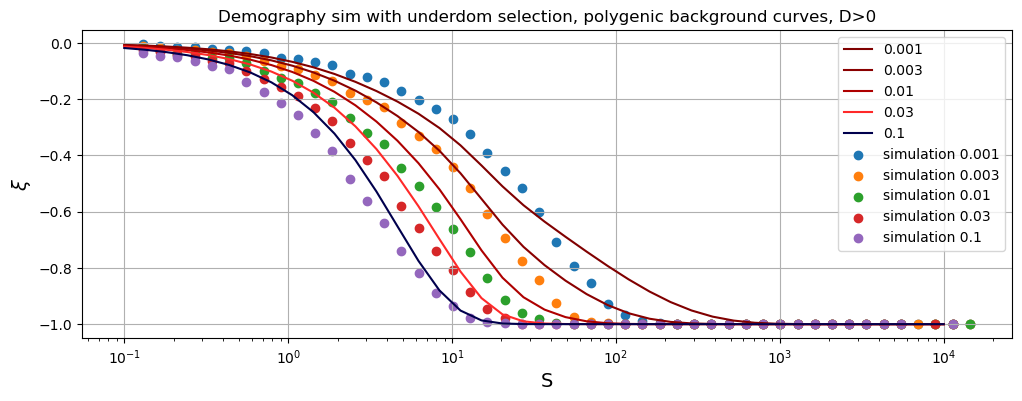

In [81]:
cmap = get_cmap('seismic_r')
norm = Normalize(vmin=0.001, vmax=0.1)

MAF_thr_values = [0.1, 0.03, 0.01, 0.003, 0.001][::-1]
sigma_set = np.logspace(-1, 4, 40)

for MAF_thr in MAF_thr_values:
    corr_set = [stab_corr_posLD_poly(MAF_thr, sigma) for sigma in sigma_set]
    plt.plot(sigma_set, corr_set, color=cmap(norm(MAF_thr)), label=str(MAF_thr))

for ind in corr_df_tot.index:
    plt.scatter(corr_df_pos.columns, corr_df_pos.loc[ind, :], label=(f'simulation {ind}'))

plt.grid()
plt.xscale("log")
plt.xlabel("S", fontsize = 14)
plt.ylabel("$\\xi$", fontsize = 14)
plt.legend()
plt.title('Demography sim with underdom selection, polygenic background curves, D>0')
plt.show()

# Dadi Simulator

In [82]:
import dadi
import pandas as pd
from dadi import PhiManip, Integration, Spectrum

xx = dadi.Numerics.default_grid(5000)
# We want to estimate phi for our given demography. First a 
# burn in period
phi = PhiManip.phi_1D(xx)
initial_pop = 14620
phi = Integration.one_pop(phi, xx, 100000, nu=initial_pop)

# Next, we want demography. Create a lambda function representing
# the population over time
populations = pd.read_csv('demo_Ns.txt', header=None).to_numpy().squeeze()
nu_func = lambda t : 2*populations[int(t)]
phi = Integration.one_pop(phi, xx, 999, nu=nu_func)

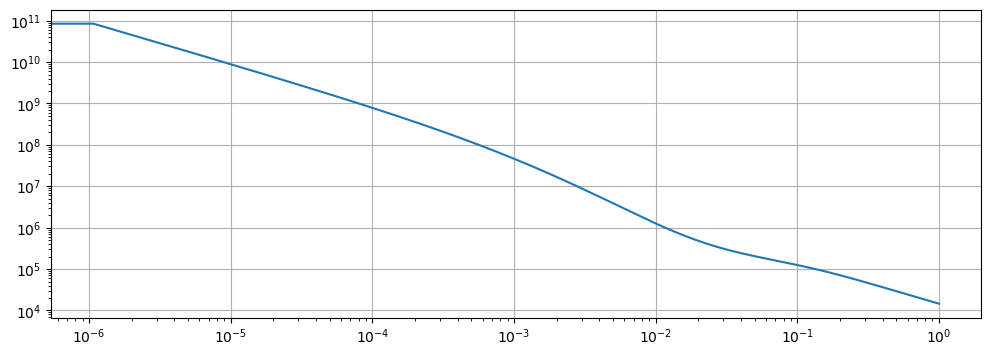

In [83]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(xx, phi)
plt.yscale("log")
plt.xscale("log")
plt.grid()
# plt.legend()
plt.show()

# dadi.Plotting.plot_1d_fs(fs_three_epoch)

# Demography

In [2]:
# Let's start by reading in some of these files
from os import listdir
from os.path import isfile, join
import re

mypath='/n/scratch/users/s/sjg319/sim_outputs/recomb/10/underdom/'
gz_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

# Define the function that builds the dfs
def buildDF(site_1, gz_files):
    pattern = re.compile(f'{site_1}_[0-9]+\.txt\.gz')
    specified_files = []
    for file in gz_files:
        if bool(pattern.match(file)):
            specified_files.append(file)

    # Build the dataframe
    df_list = [pd.read_csv(mypath + f'/{file}', sep='\t', compression='gzip') for file in specified_files]
    sim_df = pd.concat(df_list)

    return sim_df

<>:10: SyntaxWarning: invalid escape sequence '\.'
<>:10: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_26704/3505412583.py:10: SyntaxWarning: invalid escape sequence '\.'
  pattern = re.compile(f'{site_1}_[0-9]+\.txt\.gz')


In [84]:
import numpy as np

mypath='/n/scratch/users/s/sjg319/sim_outputs/demography'

# Build the dataframe
df_list = [pd.read_csv(f'{mypath}/demography_selec_0_{i}.txt.gz', sep='\t', compression='gzip') for i in np.arange(1, 1001)]
sim_df = pd.concat(df_list)

In [86]:
def windowSmoothing(vec, w_size):
    smoothed = vec

    for i in range(len(vec) - 2*w_size):
        smoothed[i+w_size] = np.mean(vec[(i+w_size): (i+2*w_size)])

    return smoothed

6.839945280437756e-05

In [93]:
def line_scat(val_vec):
    d = {}
    for i in val_vec:
        if not d.get(i):
            d[i] = 0
        d[i] += 1
    ks = sorted(list(d.keys()))
    vs = [d[i] for i in ks]
    return ks, vs

ks_1, vs_1 = line_scat(sim_df["N01"] + sim_df["N11"])
ks_2, vs_2 = line_scat(sim_df["N10"] + sim_df["N11"])
ks_3, vs_3 = line_scat(sim_df["N11"])

# vs_1 = windowSmoothing(vs_1, 50)
# vs_2 = windowSmoothing(vs_2, 50)
# vs_3 = windowSmoothing(vs_3, 50)

ks_1 = ks_1 / sim_df.iloc[0, :].sum()
ks_2 = ks_2 / sim_df.iloc[0, :].sum()
ks_3 = ks_3 / sim_df.iloc[0, :].sum()

# plt.plot(np.array(ks_2), np.array(vs_2)/len(sim_df), label="site2")
plt.plot(np.array(ks_1), np.array(vs_1)/len(sim_df), label="single site")
plt.plot(np.array(ks_3), np.array(vs_3)/len(sim_df), label="double mutants")
# plt.plot(x, y, label="hyperbolic expectation")

# We rescale so that integrals are about the same
phi_int = 0
for i in range(10, (len(phi) - 1)):
    phi_int += phi[i]*(xx[i+1] - xx[i])

sim_int = 0
scale = np.array(vs_2)/len(sim_df)
for i in range(1, (len(ks_2) - 1)):
    sim_int += scale[i] * (ks_2[i+1] - ks_2[i])

phi_scale = sim_int * phi / phi_int


plt.plot(xx, phi_scale, label='dadi simulation')

plt.yscale("log")
plt.xscale("log")
plt.grid()
plt.legend()
plt.xlabel("AF", fontsize=16)
plt.ylabel("Frequency", fontsize=16)

cutoff = 1/14620
ax = plt.gca()
ax.set_xlim([cutoff, 1])

plt.savefig('dadi_demography_plot.pdf')
plt.show()